In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot #To find out the influential variables
import statsmodels.formula.api as smf
import numpy as np

In [2]:
Company = pd.read_csv("50_Startups.csv")
Company.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
Company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
Company['State'] = Company['State'].astype('category')  

In [5]:
Company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   R&D Spend        50 non-null     float64 
 1   Administration   50 non-null     float64 
 2   Marketing Spend  50 non-null     float64 
 3   State            50 non-null     category
 4   Profit           50 non-null     float64 
dtypes: category(1), float64(4)
memory usage: 1.8 KB


In [6]:
Company.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
Company.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


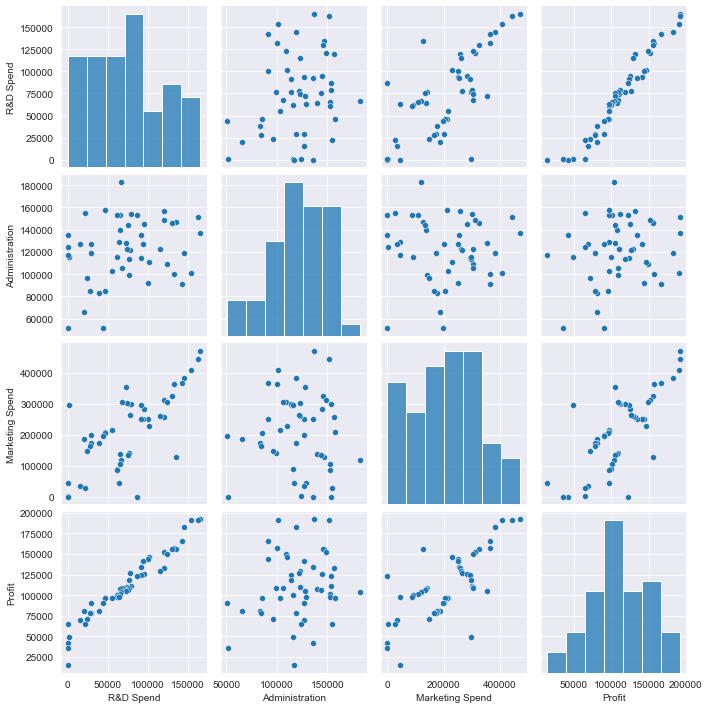

In [8]:
sns.set_style(style='darkgrid')
sns.pairplot(Company)

In [9]:
Company1 = Company.rename({'R&D Spend': 'RnDSpend', 'Marketing Spend': 'MarketingSpend'}, axis=1)

In [10]:
#Build model 1
import statsmodels.formula.api as smf 
model = smf.ols('Profit~RnDSpend+Administration+MarketingSpend',data=Company1).fit()

In [11]:
model.params

Intercept         50122.192990
RnDSpend              0.805715
Administration       -0.026816
MarketingSpend        0.027228
dtype: float64

In [12]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept          7.626218
RnDSpend          17.846374
Administration    -0.525507
MarketingSpend     1.655077
dtype: float64 
 Intercept         1.057379e-09
RnDSpend          2.634968e-22
Administration    6.017551e-01
MarketingSpend    1.047168e-01
dtype: float64


In [13]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [14]:
ml_a=smf.ols('Profit~Administration',data = Company1).fit()  
#t and p-Values
print(ml_a.tvalues, '\n', ml_a.pvalues)  

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


In [15]:
ml_m=smf.ols('Profit~MarketingSpend',data = Company1).fit()  
#t and p-Values
print(ml_m.tvalues, '\n', ml_m.pvalues)

Intercept         7.808356
MarketingSpend    7.802657
dtype: float64 
 Intercept         4.294735e-10
MarketingSpend    4.381073e-10
dtype: float64


In [16]:
ml_p=smf.ols('Profit~Administration+MarketingSpend',data = Company1).fit()  
#t and p-Values
print(ml_p.tvalues, '\n', ml_p.pvalues) 

Intercept         1.142741
Administration    2.467779
MarketingSpend    8.281039
dtype: float64 
 Intercept         2.589341e-01
Administration    1.729198e-02
MarketingSpend    9.727245e-11
dtype: float64


In [17]:
rsq_admin = smf.ols('Administration~RnDSpend+MarketingSpend',data=Company1).fit().rsquared  
vif_admin = 1/(1-rsq_admin) 

rsq_rnd = smf.ols('RnDSpend~Administration+MarketingSpend',data=Company1).fit().rsquared  
vif_rnd = 1/(1-rsq_rnd) 

rsq_market = smf.ols('MarketingSpend~Administration+RnDSpend',data=Company1).fit().rsquared  
vif_market = 1/(1-rsq_market) 

# Storing vif values in a data frame
d1 = {'Variables':['RnDSpend','AdminSpend','MarketingSpend'],'VIF':[vif_rnd,vif_admin,vif_market]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RnDSpend,2.468903
1,AdminSpend,1.175091
2,MarketingSpend,2.326773


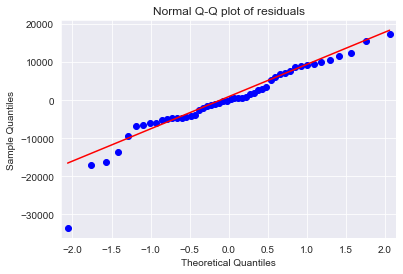

In [18]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [58]:
residuals = model.resid 
residuals.head()

0    -259.422890
1    2635.291768
2    8903.110904
3    9205.289974
4   -5951.574183
dtype: float64

In [20]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

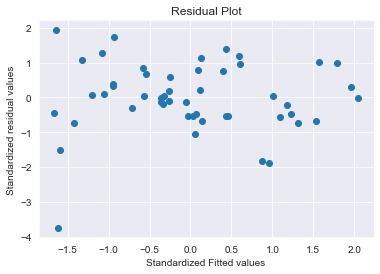

In [21]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

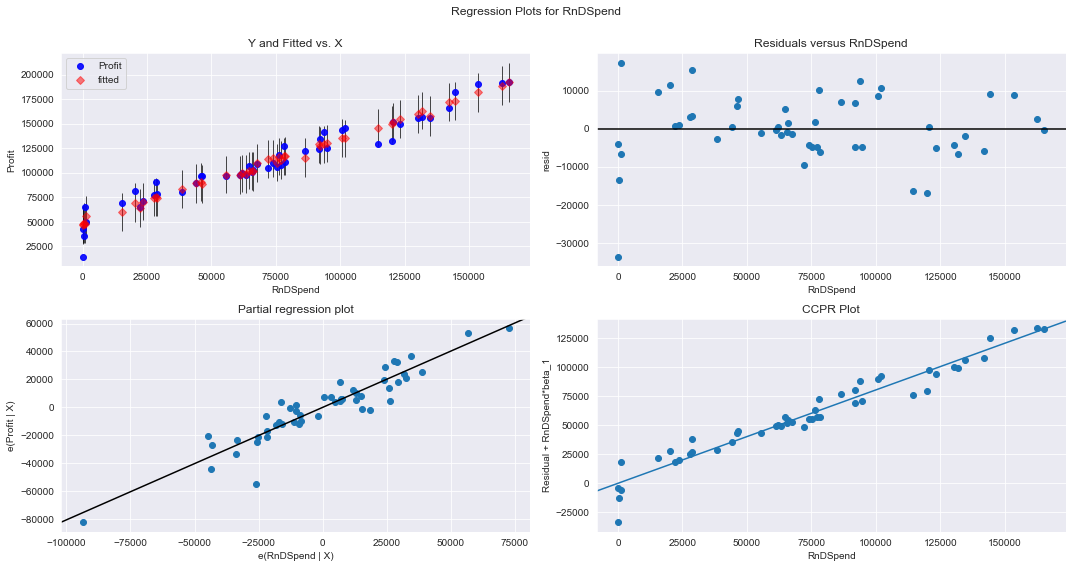

In [22]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RnDSpend", fig=fig)
plt.show()

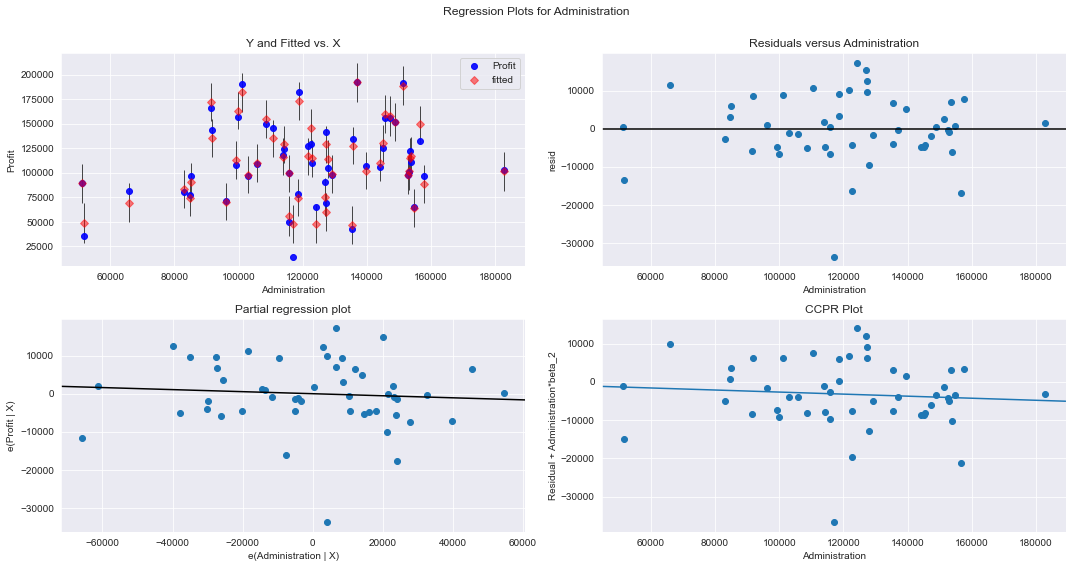

In [23]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

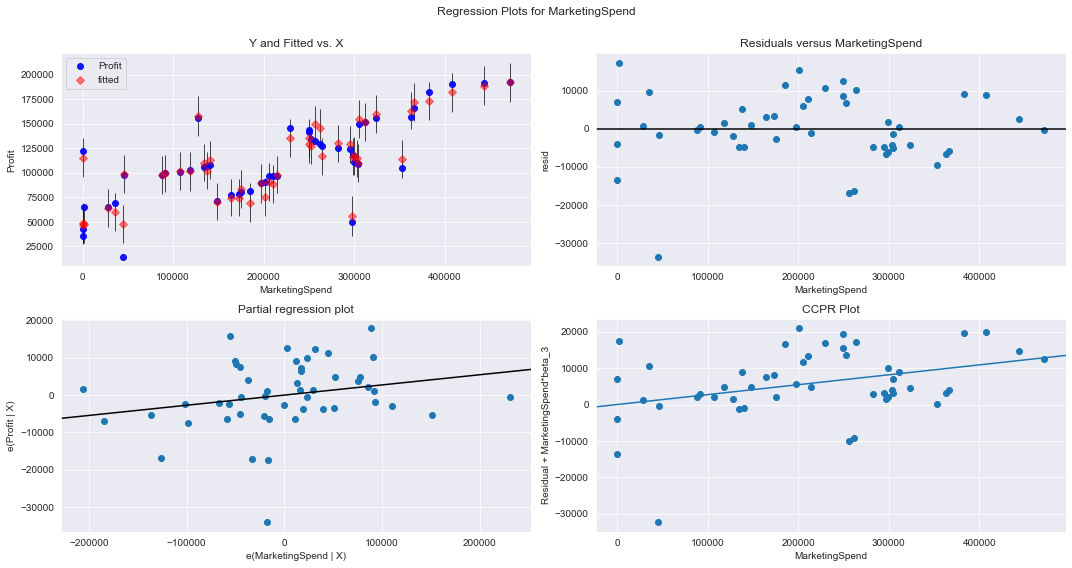

In [24]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MarketingSpend", fig=fig)
plt.show()

In [25]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance #Cook's Distance

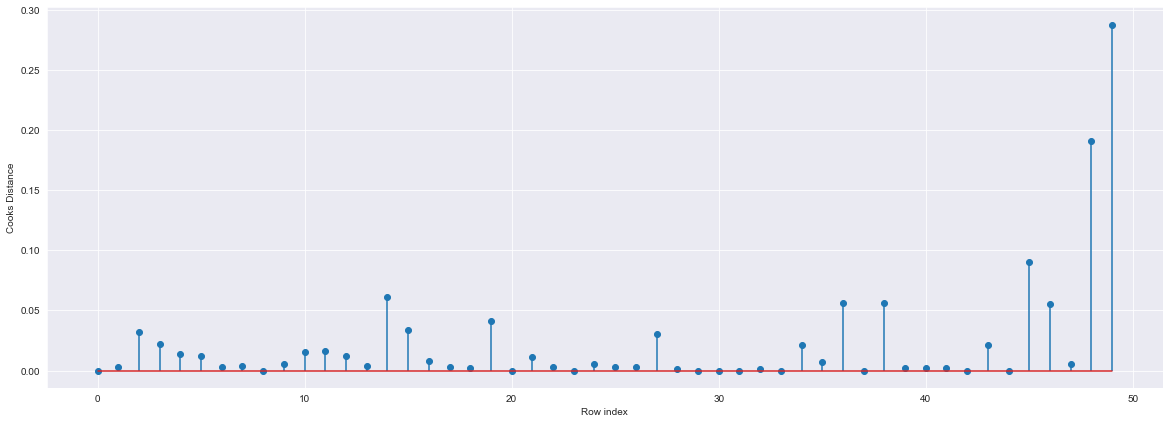

In [27]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(Company1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [28]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

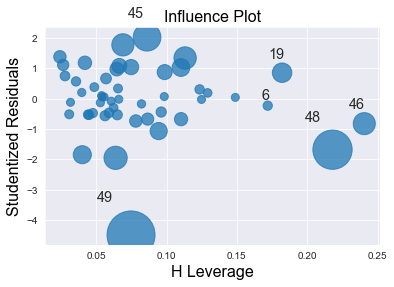

In [29]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [30]:
#Discard the data points which are influencers and reasign the row number (reset_index())
Company2=Company1.drop(Company1.index[[48,49]],axis=0).reset_index()

In [31]:
final_model= smf.ols('Profit~RnDSpend+Administration+MarketingSpend',data = Company2).fit()

In [34]:
(final_model.rsquared,model.rsquared_adj,final_model.aic)

(0.9626766170294073, 0.9475337762901719, 994.6690439260116)

# New Data Prediction

In [65]:
new_data=pd.DataFrame({'RnDSpend':165349.2,"Administration":1500,"MarketingSpend":0},index=[1])

In [66]:
final_model.predict(new_data)

1    189545.878578
dtype: float64